This is a side-project analyzing and playing with the google android market data.

In [1]:
# load dependencies
import numpy as np
import pandas as pd

In [2]:
# load file
store_df = pd.read_csv("googleplaystore.csv")
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Exploratory and Data Cleaning

In [3]:
store_df.shape

(10841, 13)

In [4]:
store_df["App"].nunique()  # even though there are 10841 entries, only 9660 are unique

9660

From dataframe, it could be seen that there are 10841 entries but there are only 9660 unique entry. So we should have a look.

In [5]:
duplicate = store_df[store_df["App"].duplicated()]
duplicate.sort_values(by=["App"])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


From the results, it seems like the duplicated entries are likely to be duplicate even though some details are slightly different. For example, "theScore" was duplicated but the reviews amount differ while "Trivago" appears to have the same information for each entry. More information is usually needed to understand why some entries are duplicated. However, this a open dataset and no further information could be found about them (I tried). Under this circumstances so we are going to go ahead and drop them.

In [6]:
# drop duplicates
store_df = store_df.drop_duplicates(subset=["App"]).reset_index(drop=True)
print(store_df.shape)  # the duplicates of the app have been removed
store_df.head()

(9660, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
# have a look at the type for each columns
store_df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

It could be seen that a few of the data types are currently not in the right category such as Reviews, Size, Installs, Price, Last Updated. Some of these columns should be converted to the right type but columns like Size where there are strings in some of the values can't be changed into values immediately. We'll go ahead and change some of the other columns into the correct type first.

## Change the "Installs" column

### Replacing a row with errors

In [8]:
# when you try to change "Installs", there's apparently an entry with "Free" Installs; this means that there is an error somehwere
# have a look
store_df[store_df["Installs"]=="Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
store_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

When you're trying to change the "Installs", you will notice that there is an entry with "Free" for Installs. This means that there is an error somewhere as this column is meant to number of downloads. When you look at that entry, you'll find that the "Category" is not available and everything else has fallen into the wrong column. A search on Google revealed that the App falls under "Lifestyle" category. We'll need to fix this before moving on.

In [10]:
# to make amendment
new = store_df[store_df["App"]=="Life Made WI-Fi Touchscreen Photo Frame"].values.tolist()  # returns a list of list
new = new[0]
new.insert(1, "LIFESTYLE")
new[9] = "Lifestyle"
del new[-1]
new[3]

19.0

In [11]:
# let's remove the old and replace with new
print(len(store_df))  # old num of rows were 9660
store_df = store_df.drop([9300])
print(len(store_df))  # the old incorrect row has been removed

9660
9659


In [12]:
# append the new row
new_series = pd.Series(new, index = store_df.columns)
store_df = store_df.append(new_series, ignore_index=True)
store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device
9659,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up


### Change the "Installs" values

In [13]:
# change installs
installs = list(store_df["Installs"])
for i in range(len(installs)):
    if "+" in installs[i]:
        installs[i] = installs[i].replace("+", "")
    if "," in installs[i]:
        installs[i] = installs[i].replace(",", "")
    installs[i] = int(installs[i])
store_df["Installs"]=installs
store_df.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs           int64
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

## Change the "Reviews"

In [14]:
# change Reviews
# some entry contains letters eg 3.8M so we're using regex to get only the float
revs = list(store_df["Reviews"])
# print(revs)
for i in range(len(revs)):
    if isinstance(revs[i], float) is False and "M" in revs[i]:  # if the number is short for millions
        tmp = revs[i].replace("M", "")
        revs[i] = float(revs[i]) 
        revs[i] = revs[i]*1000000
    revs[i] = int(revs[i])
store_df["Reviews"] = revs  # replace the old columns with new values 
store_df.dtypes

App               object
Category          object
Rating            object
Reviews            int64
Size              object
Installs           int64
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

## Change date-time

In [15]:
store_df["Last Updated"] = pd.to_datetime(store_df["Last Updated"])
store_df.dtypes

App                       object
Category                  object
Rating                    object
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## Change the "Price"

In [16]:
store_df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# remove the dollar and change dtype to float
store_df["Price"] = store_df["Price"].apply(lambda x: x.replace('$','')).astype(float)
store_df.dtypes

App                       object
Category                  object
Rating                    object
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [18]:
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Explore the "Genres"

In [19]:
store_df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [20]:
print(len(store_df["Category"].unique()))

33


In [21]:
# explore genre
store_df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

The "Genres" is basically "Category" but hashed out. Later on, during machine learning stage, we might want to use the category. However, for machine learning, it's vital to turn them into numeric, ie encoding. The caveat is that as there are quite a few categories, there's going to be several groups.

### Encode "Category" into labels using sklearn

In [22]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
label.fit(store_df["Category"].unique())
categories = store_df["Category"]
num_cat = label.transform(categories)
store_df["Category_num"] = pd.Series(num_cat)
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0


## Explore the "Type"

In [23]:
store_df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [24]:
store_df[(store_df["Type"]!= "Free") & (store_df["Type"]!= "Paid")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num
8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,11


This dataset was taken a few years back. Some data were probably not available back then but it's available now. I've taken the liberty to look it up and shall replace this with new data which is available at the moment writing (21st November, 2020). Then, I'll encode them into numeric for machine learning later.

In [25]:
store_df.at[8028, "Rating"] = 3.8
store_df.at[8028, "Reviews"] = 131338
store_df.at[8028, "Type"] = 'Free'
store_df.at[8028, "Installs"] = 1000000

In [26]:
# encode "Type" into numeric
type_label = preprocessing.LabelEncoder()
type_label.fit(store_df["Type"].unique())
type_cat = store_df["Type"]
type_num = type_label.transform(type_cat)
store_df["Types_num"] = pd.Series(type_num)

## Explore "Content Rating"

In [27]:
store_df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [28]:
# encoding content rating
content_label = preprocessing.LabelEncoder()
content_label.fit(store_df["Content Rating"].unique())
content_cat = store_df["Content Rating"]
content_num = content_label.transform(content_cat)
store_df["Content_num"] = pd.Series(content_num)

In [29]:
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0,0,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,0,1


## Preliminary graphical exploration

/home/han/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 0.96, 'Distribution for Various Variables')

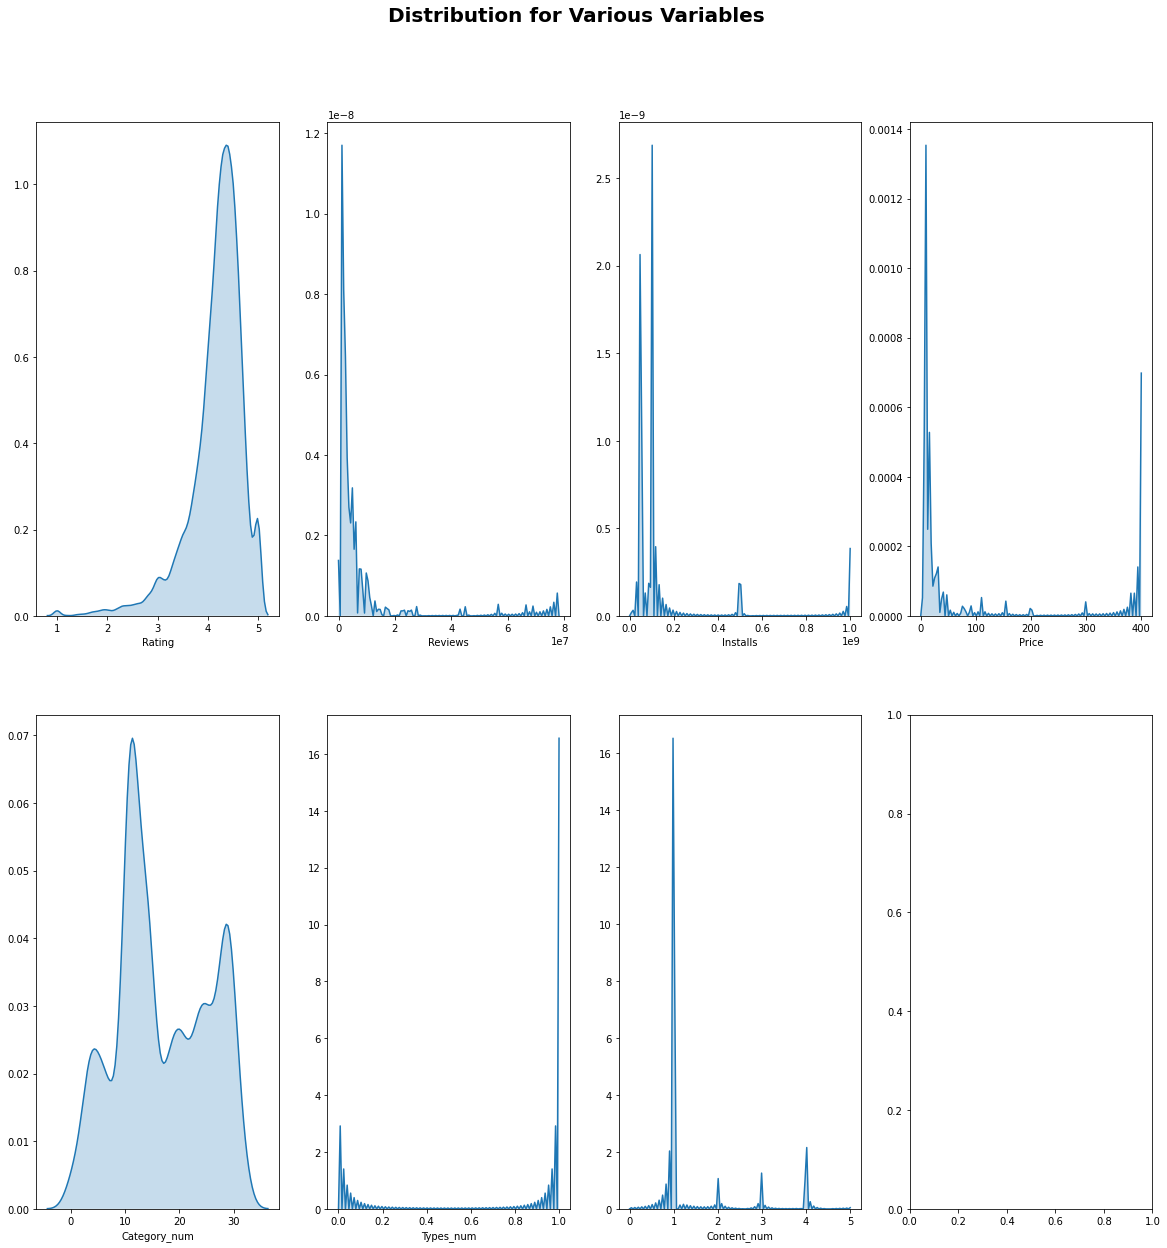

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, axes = plt.subplots(2,4, figsize=(20,20))
variables = ["Rating", "Reviews", "Installs", "Price", "Category_num", "Types_num", "Content_num"]
for ax, features in zip(axes.flat, variables):
    data = store_df[features]
    sns.distplot(data, ax=ax, bins=20, hist=False, kde_kws={"shade": True})
plt.suptitle("Distribution for Various Variables", fontweight="bold", fontsize=20, y=0.96)

## Change the "Rating"

In [31]:
# count how many NaN
store_df["Rating"].isna().sum()

1462

In [32]:
store_df["Rating"] = pd.to_numeric(store_df["Rating"])
store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Category_num               int64
Types_num                  int64
Content_num                int64
dtype: object

There are 1463 entries in "Rating" that are still missing. I'm going to impute the missing value using the features such as "Category", "Genres", "Content Rating", "Type" and "Price". "Rating" has a left-skewed distribution. I decided not to use mean imputation which was commonly used as I felt that this would distort the relationship between the variables. Instead, I'm going to impute using a method from sklearn that mimics missForest in R., we're using IterativeImputer with ExtraTreesRegressor to mimic missForest in R. missForest imputes mising data using mean/mode first then for each variable with mv, it fits random forest and imputes the missing part. It does not assumes normality which is great as the distribution is obviously anything but.

In [33]:
# to impute the missing values
ratings = store_df["Rating"].tolist()
from numpy import nan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=10, random_state=0)
imp = IterativeImputer(estimator=etr, random_state=0)  #
variables = ["Rating", "Reviews", "Installs", "Price", "Category_num", "Types_num", "Content_num"]
test = store_df[variables].values.tolist()
x = np.reshape(test, (-1,7))  # need to reshape it to use iterativeimputer
imp.fit(x)
y = imp.transform(x)
new_rating = [sublist[0]for sublist in y]
store_df["Ratings_imp"] = new_rating

## Explore the "Size"

In [34]:
mask = store_df["Size"].str.contains(r"M", na=True)  # check if all size is measured in megabytes
store_df.loc[mask==False, "Size"]

37      Varies with device
42      Varies with device
52      Varies with device
58                    201k
67      Varies with device
               ...        
9616                 1020k
9644    Varies with device
9650                  582k
9651                  619k
9657    Varies with device
Name: Size, Length: 1541, dtype: object

Not all size of the apps are measured in megabytes. Some of them are smaller while and some varies with device. In order to perform calculation later, we'll need to remove the "M" and "k" , and impute the one sthat say "Varies with device". The new size will be measured in kb.

In [35]:
sizes = store_df["Size"].tolist()
from numpy import nan
for i, size in enumerate(sizes):
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size.endswith("M"):
        size = float(size[:-1])
    else:
        size = np.nan
    sizes[i] = size
store_df["Size_Mb"] = sizes
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,0,1,4.1,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,0,1,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,0,1,4.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0,0,4,4.5,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,0,1,4.3,2.8


### Imputation of missing sizes

In [36]:
# use IterativeImputer to impute missing values
# this imputation uses other features to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=10, random_state=0)
imp = IterativeImputer(estimator=etr, random_state=0)  #
variables = ["Rating", "Reviews", "Installs", "Price", "Size_Mb"]
test = store_df[variables].values.tolist()
x = np.reshape(test, (-1,5))  # need to reshape it to use iterativeimputer
imp.fit(x)
y = imp.transform(x)
new_size = [sublist[4]for sublist in y]
store_df["Size_Mb"] = new_size

In [37]:
store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Category_num               int64
Types_num                  int64
Content_num                int64
Ratings_imp              float64
Size_Mb                  float64
dtype: object

# Answering some queries

For the next section, the dataset will be explored to help to answer a few questions. Such as which is the most popular category? For 2016? 2017? 2018?

## Which is the most popular category?

First question, how does one measure popularity? Number of downloads? Number of reviews? Rating? Personally, I feel that when an app gets popular, you'll tend to hear it in the social media and people tend to suggest an app to you. For example, your friends will most likely have suggested certain apps to you before. Given this reason, I decided to measure popularity by number of installs.

In [38]:
popular = store_df.groupby(["Category"])["Installs"].sum().reset_index()
popular.sort_values("Installs", ascending=False).head()

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902


The most popular category is "GAME" where there are a total of 1,387,8924,415 or roughly 1.4 billion downloads.

## Which app is the most popular by category?

In [39]:
pop_by_cat = store_df.sort_values(["Installs"], axis=0, ascending=False).groupby("Category").head(1)
pop_by_cat.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
2002,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,27,0,4,4.1,85.5
2429,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,30,0,1,4.2,41.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,0,4,3.9,28.2
2977,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,21,0,4,3.9,13.0
2908,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device,31,0,4,4.3,70.2


Here,each category's most popular app is shown. Note that for some category, there maybe more than just one app with the same number of installs. However, only one is shown.

## Which app is the largest?

In [40]:
# To answer this question, we'll ignore the the ones that varies with device as we have no means of 
# sourcing the information and those with k as they are smaller. 
# we'll use the mask we made before
mask = store_df["Size"].str.contains(r"M", na=True)
size_arr = store_df.loc[mask]
size_arr["Size"] = size_arr["Size"].str.replace("M", "").astype("float")
max(size_arr["Size"])  # seems like the largest size is 100M and there are a few of them

/home/han/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


100.0

In [41]:
size_arr[size_arr["Size"]==100.0].sort_values(["Installs"], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
1424,Hungry Shark Evolution,GAME,4.5,6074334,100.0,100000000,Free,0.0,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,14,0,4,4.5,100.0
6357,SimCity BuildIt,FAMILY,4.5,4218587,100.0,50000000,Free,0.0,Everyone 10+,Simulation,2018-06-19,1.23.3.75024,4.0 and up,11,0,2,4.5,100.0
1277,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000,Free,0.0,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up,18,0,1,4.0,100.0
4466,Ultimate Tennis,SPORTS,4.3,183004,100.0,10000000,Free,0.0,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,28,0,1,4.3,100.0
4876,Miami crime simulator,GAME,4.0,254518,100.0,10000000,Free,0.0,Mature 17+,Action,2018-07-09,2.0,4.0 and up,14,0,3,4.0,100.0


There are a few app with size of 100M. I've decided to arrange them according to the number of downloads. So the largest app that get the most download is Hungry Shark Evolution.

## Which app has the largest download?

In [42]:
store_df.sort_values(["Installs"], ascending=False).iloc[0]["App"]

'Facebook'

The app with the largest download overall is Facebook.

## Which software hasn't been updated? Which one is last updated?

In [43]:
store_df[store_df["Last Updated"]==min(store_df["Last Updated"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
6430,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,11,0,1,4.2,0.209


In [44]:
store_df[store_df["Last Updated"]==max(store_df["Last Updated"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
9040,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000,Free,0.00,Everyone,Tools,2018-08-08,1.1.9,4.0.3 and up,29,0,1,4.3,3.60
9236,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000,Free,0.00,Teen,Action,2018-08-08,1.1.2,4.1 and up,14,0,4,4.3,27.00
9535,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,1000000,Free,0.00,Everyone,Shopping,2018-08-08,Varies with device,Varies with device,26,0,1,4.4,23.94
9540,BankNordik,FINANCE,3.9,28,15M,5000,Free,0.00,Everyone,Finance,2018-08-08,7.3.2,5.0 and up,12,0,1,3.9,15.00
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,15,1,1,4.4,2.40


The app that hasn't been updated in a while is "FML" (which is irony given it's in "Family" category). There are a few app that were the most recently updated: Video Downloader for FB, Shoot Hunter-Gun Killer, Lalafo Pulsuz Elanlar, BankNordik and Fast Tract Diet.

# Visualisations

### Preliminary visualisation

In [45]:
store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_num,Types_num,Content_num,Ratings_imp,Size_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,0,1,4.1,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,0,1,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,0,1,4.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0,0,4,4.5,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,0,1,4.3,2.8


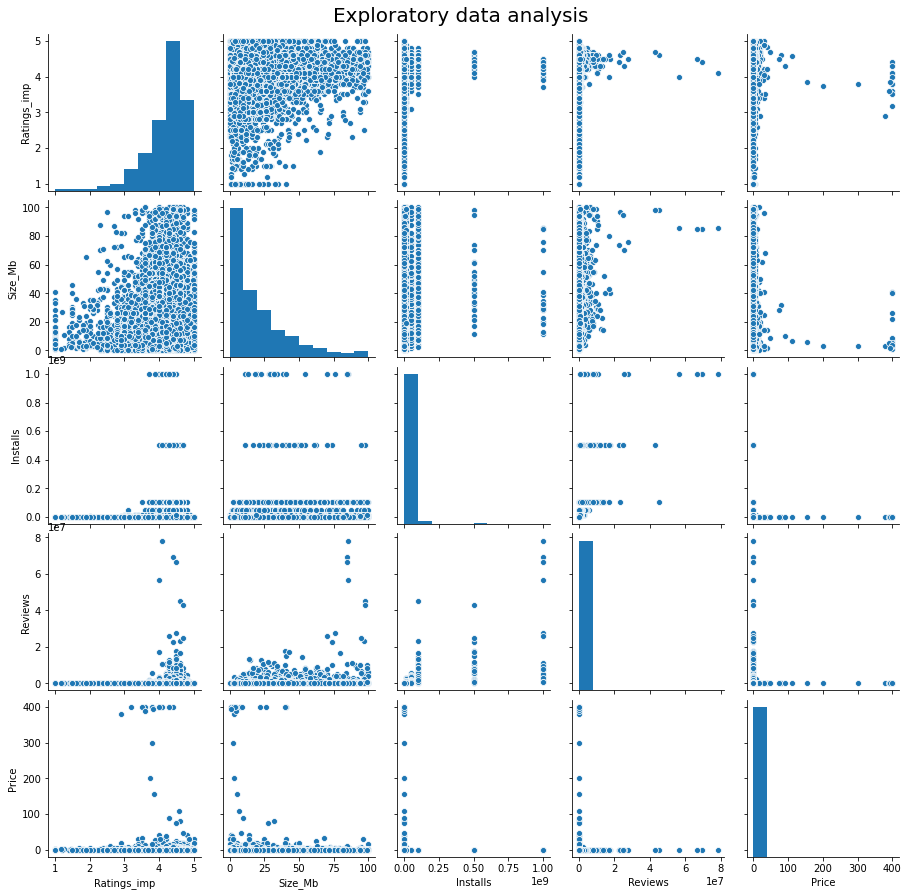

In [46]:
variables = ["Ratings_imp", "Size_Mb", "Installs", "Reviews", "Price"]
# plt.figure(figsize=(15,15)).add_axes([0.1, 0.1, 0.6, 0.75])
sns.pairplot(store_df[variables]).fig.subplots_adjust(top=.95)
plt.suptitle("Exploratory data analysis", fontsize=20)
plt.savefig("/home/han/Projects/Android_apps/Graphs/EDA.png")

## The distribution of the size and ratings for Free vs Paid

Given that Free vs Paid means that Free is $0, so we don't have to plot the "Price" variable. "Reviews" and "Installs" don't quite make sense to be plotted as distribution as they act like categorical data. So, we'll just keep to Ratings and Size.

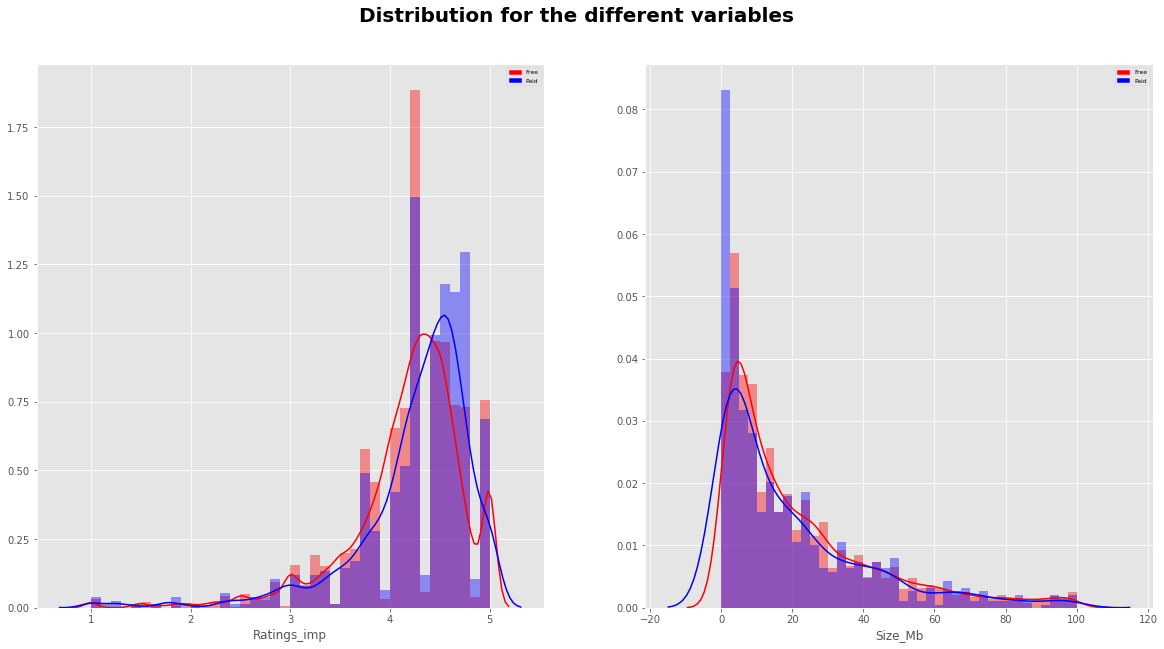

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

# set the legend
import matplotlib.patches as patches
red = patches.Patch(color="red", label="Free")
blue = patches.Patch(color="blue", label="Paid")

variables = ["Ratings_imp", "Size_Mb"]
f, axes = plt.subplots(1,2, figsize=(20,10))
for ax, features in zip(axes.flat, variables):
    sns.distplot(store_df[store_df["Type"]=="Free"][features],color="red", ax=ax, bins=40)
    sns.distplot(store_df[store_df["Type"]=="Paid"][features], color="blue", ax=ax, bins=40)
    ax.legend(handles=[red, blue], loc="upper right", prop={'size': 6})

plt.suptitle("Distribution for the different variables", fontsize=20, y=0.96, fontweight="bold") 
plt.savefig("Distribution_variables_500.png", bbox_inches='tight')

Given that there is a high overlap between "Free" and "Paid", it is not likely that there will be a significant difference in "Ratings" and "Size" between "Free" and "Paid".

## Correlation between the variables

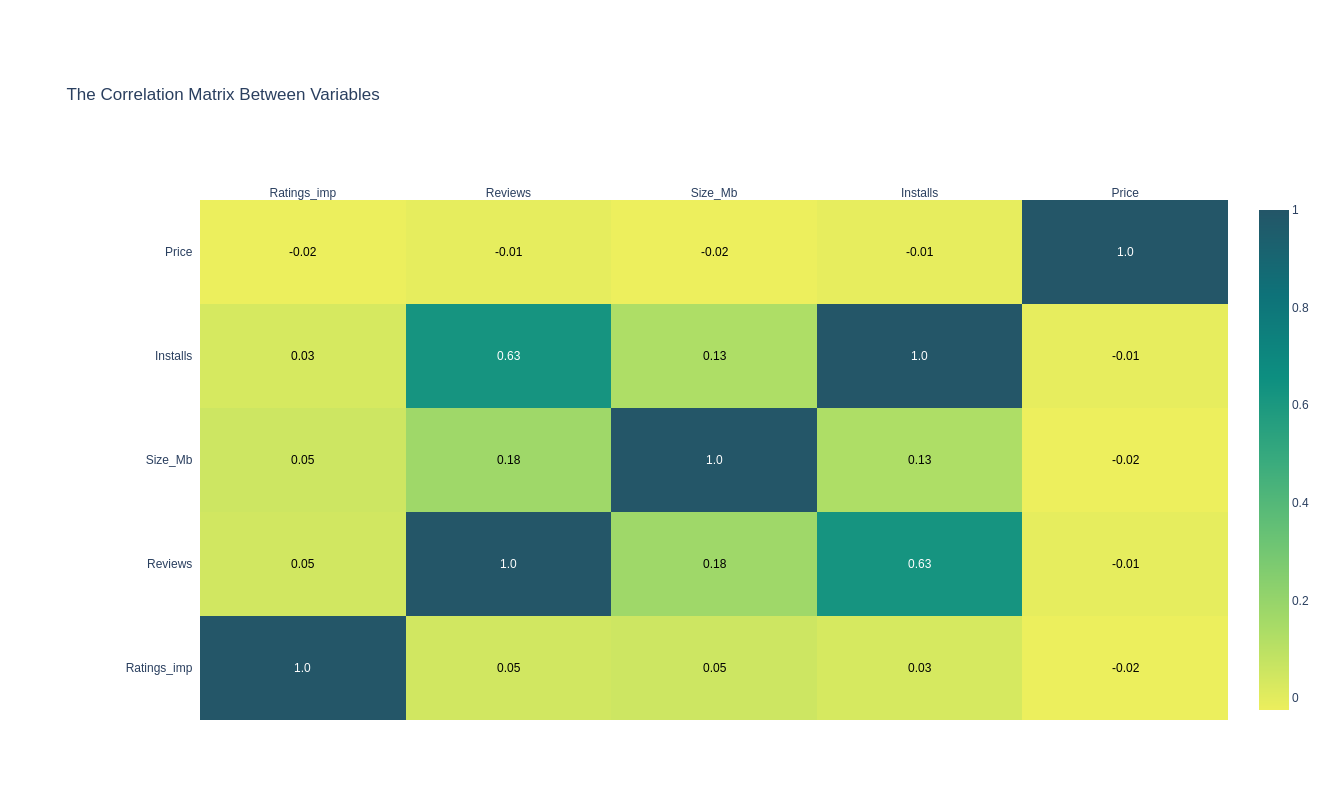

In [48]:
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

variables = ["Ratings_imp", "Reviews", "Size_Mb", "Installs", "Price"]
corrs = store_df[variables].corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Aggrnyl',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True )

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000
figure.update_layout(title_text = "The Correlation Matrix Between Variables")
#figure.write_image("/home/han/Projects/Android_apps/Graphs/correlation_matrix.png")
iplot(figure)


### correlation test

In [49]:
from scipy import stats
stats.pearsonr(store_df["Installs"], store_df["Reviews"])

(0.6251645479941589, 0.0)

It's shown that "Installs" and "Reviews" have medium, positive correlation with each other. When I applied Pearson's r, it appears that they are significant with p-value < 0. Everything else had virtually weak to no correlation.

## Which category has the biggest share of the market?

This had been answered above but we'll answer it here in the form of chart.

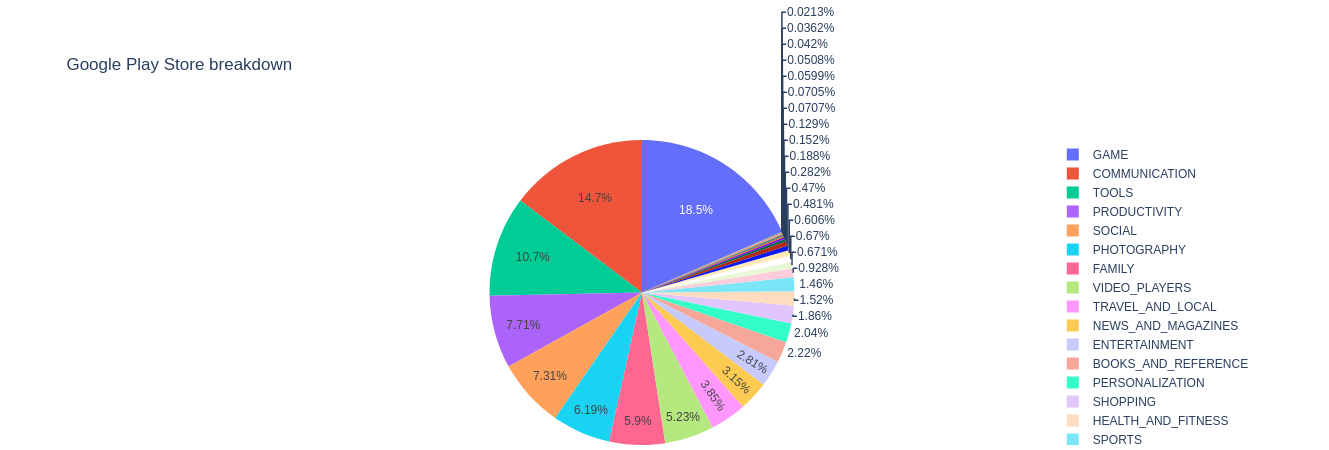

In [50]:
# pie chart
import plotly.express as px
fig = px.pie(store_df, values="Installs", names="Category", title = "Google Play Store breakdown")
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
#fig.write_image("/home/han/Projects/Android_apps/Graphs/market_breakdown.png")
fig.show()

## Which apps are in the top 10 of the most popular category (Game)?

Text(0.5, 1.0, 'Top 10 App in The Most Popular Category')

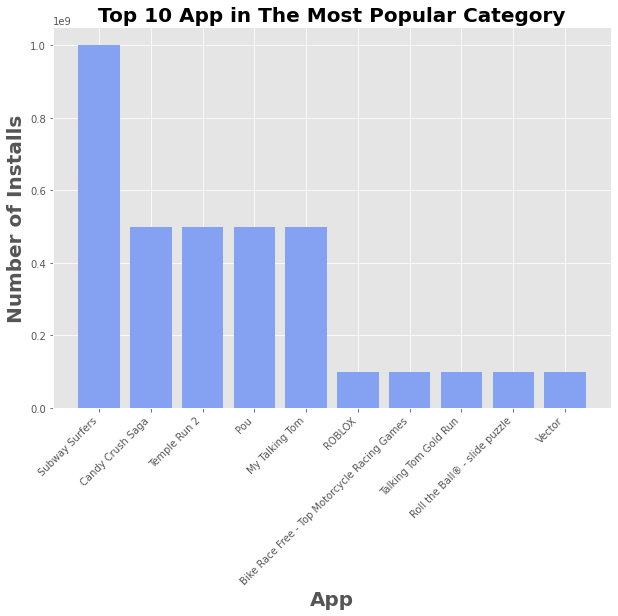

In [51]:
# The most popular category is game
game_mask = store_df[store_df.Category == "GAME"]
top_10 = game_mask.sort_values(by="Installs", ascending=False).head(10)

# plot the bar
plt.figure(figsize=(10,7))
plt.bar("App","Installs", data=top_10, color="#85A1F2")
plt.xticks(rotation = 45, ha="right")
plt.xlabel("App", fontweight="bold", fontsize=20)
plt.ylabel("Number of Installs", fontweight="bold", fontsize="20")
plt.title("Top 10 App in The Most Popular Category", fontweight="bold", fontsize=20)

## What is the distribution of ratings across the different categories?

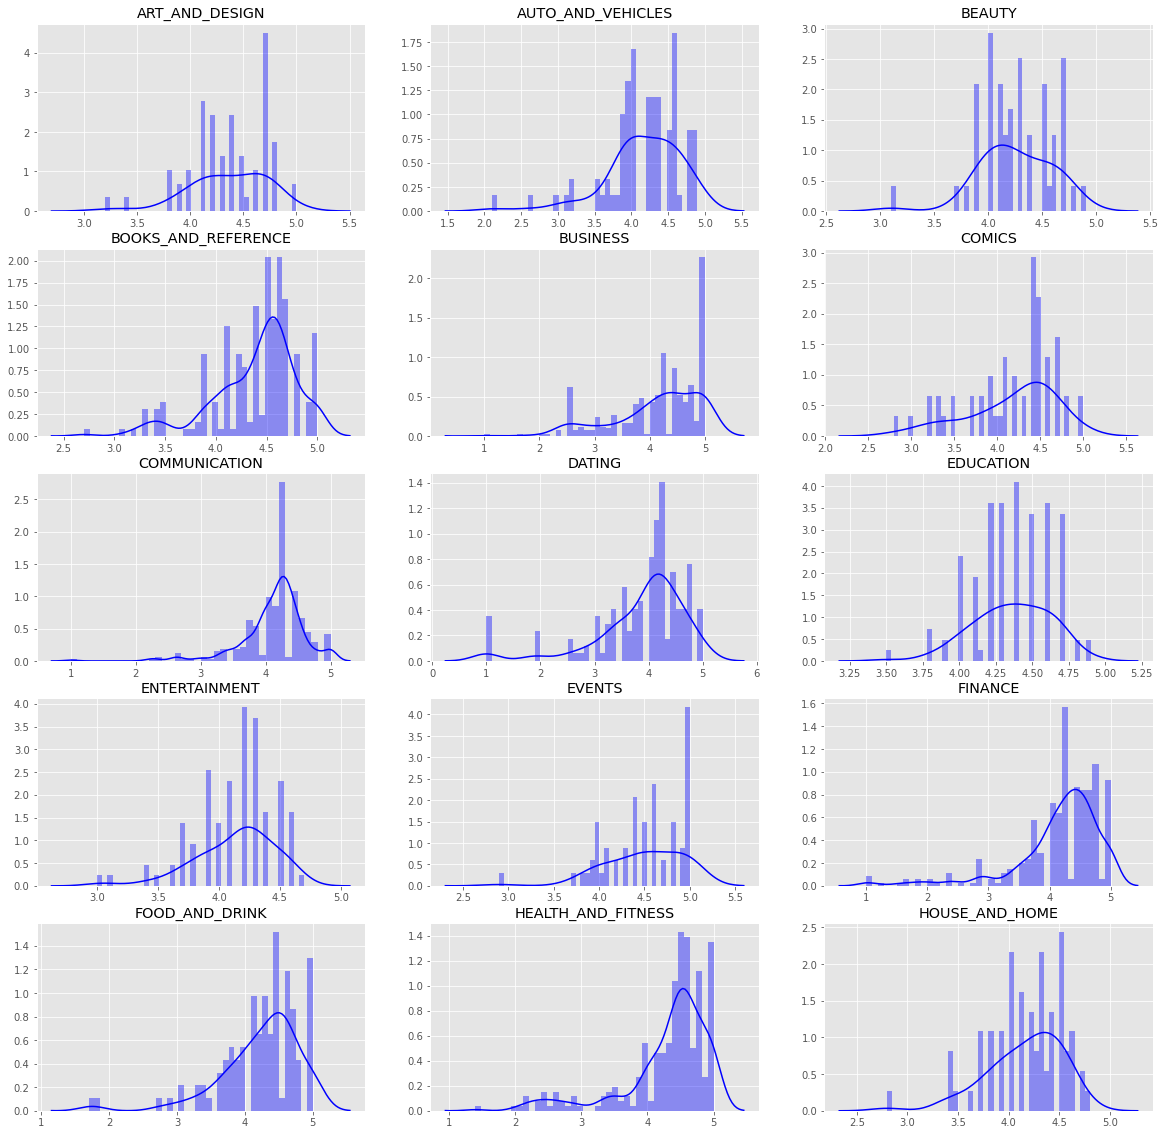

In [52]:
cat = store_df.Category.unique()
f, axes = plt.subplots(5,3, figsize=(20,20))
for ax, category in zip(axes.flat, cat):
    cat_group = store_df.loc[store_df.Category == category]
    sns.distplot(cat_group[["Ratings_imp"]], color="blue", ax=ax, bins=40)
    ax.title.set_text(category)

Given that the distribution for the ratings seems to be different for different category, it might be a good idea to conduct one-way ANOVA to test if there's truly a signifcant difference. 

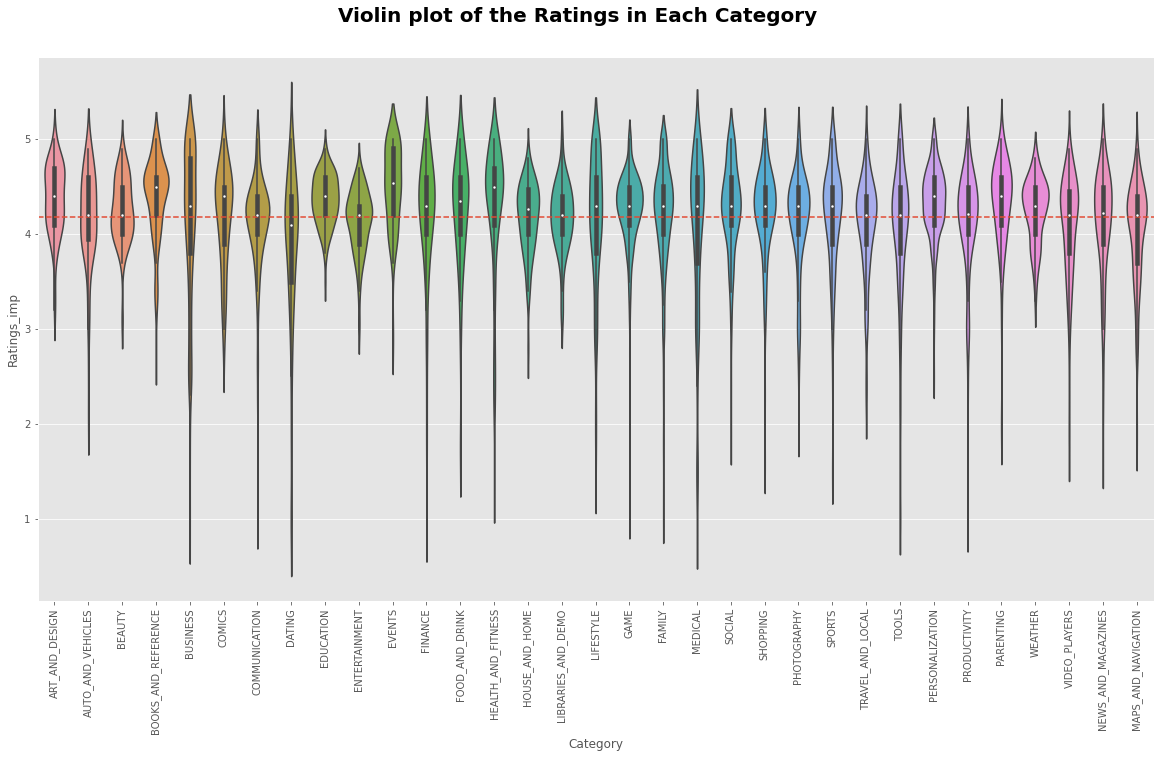

In [53]:
mean = store_df["Ratings_imp"].mean()
plt.figure(figsize=(20,10))
sns.violinplot(x="Category", y="Ratings_imp", data=store_df, cut=2)
plt.xticks(rotation =90)
plt.axhline(mean, ls = "--")
plt.suptitle("Violin plot of the Ratings in Each Category", y = 0.95, fontsize=20, fontweight="bold")
plt.savefig("/home/han/Projects/Android_apps/Graphs/violinplot.png")

From the violin plot, a few things could be seen:

- Apps in the categories of Business, Dating, Medical and Tools have a large variance in ratings.
- More than 50% of Apps in Art and Design, Books and Reference, Education, Events and Tools have higher than average ratings.
- More than 50% of Apps in Dating have lower than average ratings.

## What is the size strategy?

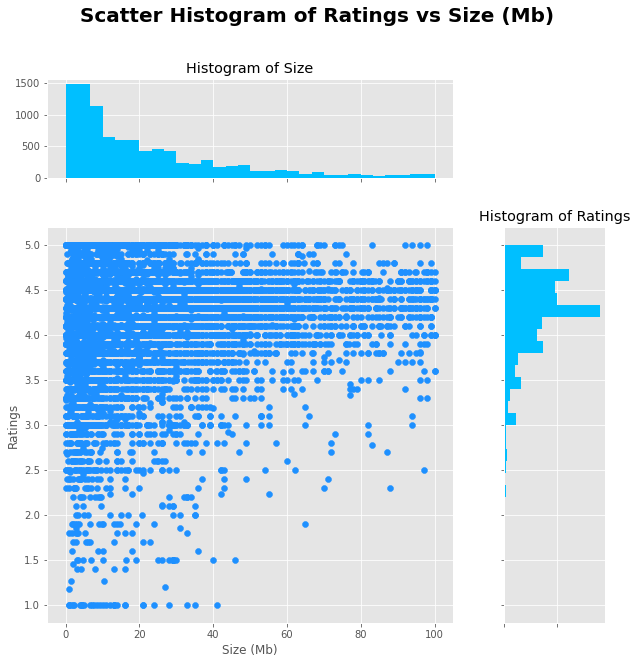

In [54]:
# scatter histogram using GridSpec
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10,10))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

# plot
x = store_df["Size_Mb"]
y = store_df["Ratings_imp"]
ax2.scatter(x,y, color="dodgerblue")
ax1.hist(x,color="deepskyblue", bins=30)
ax3.hist(y, orientation="horizontal", color="deepskyblue", bins=30)

# Turn off tick labels on marginals
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)

# Set label
ax2.set_xlabel("Size (Mb)")
ax2.set_ylabel("Ratings")

# set title
ax1.set_title("Histogram of Size")
ax3.set_title("Histogram of Ratings")
plt.suptitle("Scatter Histogram of Ratings vs Size (Mb)", fontweight="bold", fontsize=20)
plt.savefig("/home/han/Projects/Android_apps/Graphs/size_strategy.png")
plt.show()

From the scatter-histogram, it becomes evident that a large number of the apps are less than 20 Mb and more than 50% of them have the ratings of 4 and above. It appears that the apps tend to keep themselves to the light weight rather than being bulky.

### Size in the category

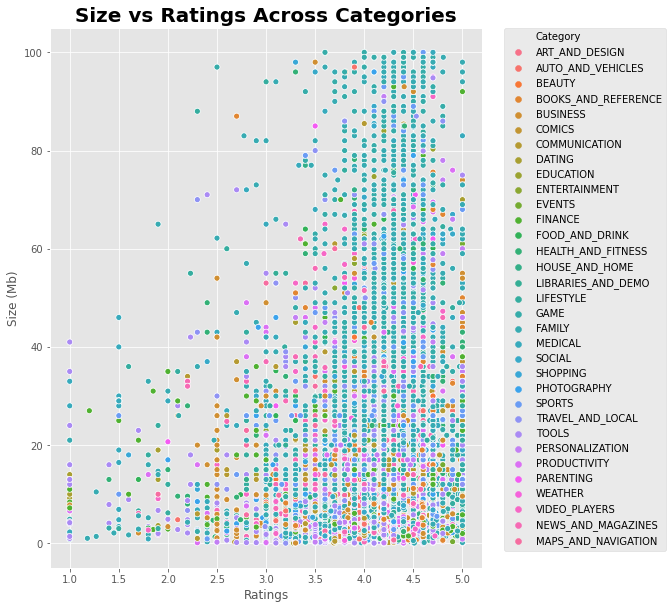

In [55]:
x = store_df["Ratings_imp"]
y = store_df["Size_Mb"]
plt.figure(figsize=(10,10)).add_axes([0.1, 0.1, 0.6, 0.75])
# plt.figure().add_axes([0.1, 0.1, 0.6, 0.75])
sns.scatterplot(x,y,hue=store_df["Category"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # move legend outside
plt.xlabel("Ratings")
plt.ylabel("Size (Mb)")
plt.title("Size vs Ratings Across Categories", fontsize=20, fontweight="bold")
plt.savefig("/home/han/Projects/Android_apps/Graphs/size_category.png")

From the scatter plot, it appears that apps from Game, Family and/or Medical tend to be pretty wide-spread in regards to size. However, these apps also seem to be pretty well-received as they have ratings of 3.5 and above. Parenting, Tools and Video players app appear to be smaller in size as they are mostly 40Mb and below but in terms of ratings, it appears that they tend to be between the range of 3.0 to 4.5.

## What is the pricing strategy?

In [56]:
# count the occurence
store_df["Type"].value_counts()  # There are 8904 Free apps vs 756 Paid apps

Free    8904
Paid     756
Name: Type, dtype: int64

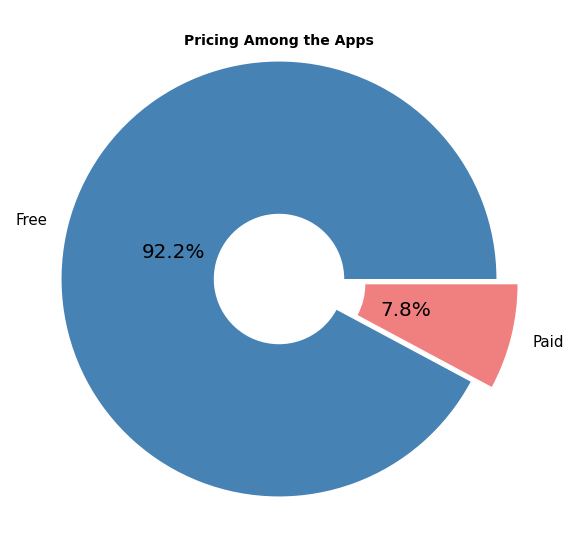

In [57]:
labels = ["Free", "Paid"]
price_data = store_df["Type"].value_counts()
pie, ax = plt.subplots(figsize=[10,10])
explode = (0, 0.1)
wedges,texts, autotexts = plt.pie(x=price_data, autopct="%.1f%%", labels=labels, pctdistance=0.5, colors = ["steelblue", "lightcoral"], explode=explode, wedgeprops=dict(width=0.7))
plt.setp(autotexts, size=20)
for i in range(len(texts)):
    texts[i].set_fontsize(15)
plt.title("Pricing Among the Apps", fontsize=14, fontweight="bold", y=0.92)
plt.savefig("/home/han/Projects/Android_apps/Graphs/Pricing_apps.png")

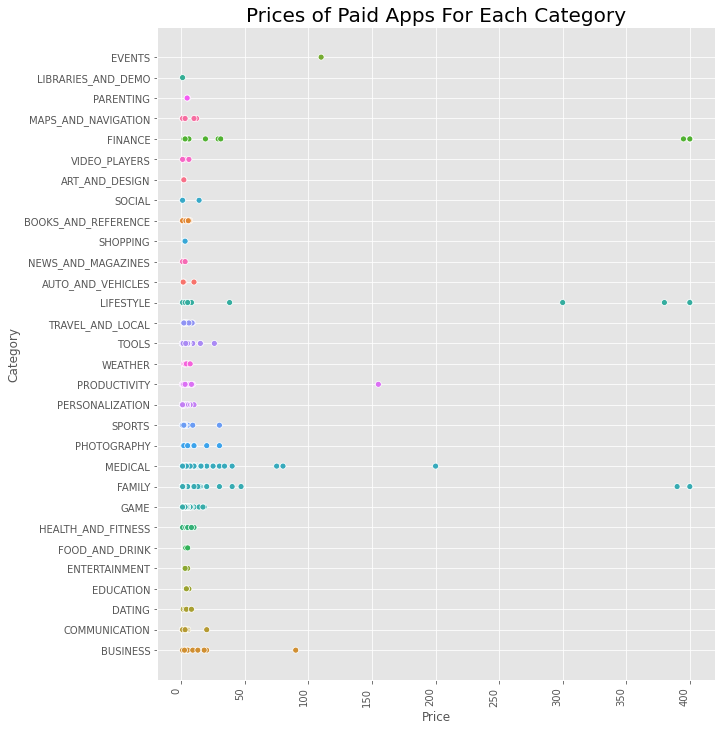

In [58]:
x = store_df["Category"]
y = store_df[store_df["Type"] == "Paid"]["Price"]
plt.figure(figsize=(10,12))
sns.scatterplot(y,x,hue=store_df["Category"], legend=None)
plt.xticks(rotation = 90, ha="right")
plt.title("Prices of Paid Apps For Each Category", fontsize=20)
plt.savefig("/home/han/Projects/Android_apps/Graphs/price_each_category.png")

In [59]:
cols = ["App", "Price"]
store_df[store_df["Price"] > 100.0][cols]

,App,Price
3327,most expensive app (H),399.99
3465,💎 I'm rich,399.99
3469,I'm Rich - Trump Edition,400.00
4396,I am rich,399.99
4398,I am Rich Plus,399.99
4399,I am rich VIP,299.99
4400,I Am Rich Premium,399.99
4401,I am extremely Rich,379.99
4402,I am Rich!,399.99
4403,I am rich(premium),399.99


From the pie chart, only 7.8% of the Apps are in the Paid category. Out of the paid category, more than 50% of them are \\$100 and below. Only 10 of them are above \\$100. When looking at those expensive apps, I am legit shooketh. Smh. Wikipedia claimed that the "I am rich" apps were apparently "a work of art with no hidden function at all" and their creation was for no other reason than to show off that they could afford it. Somebody expressed their suprise that Game apps are less than \\$100. A gamer would understand that the companies do not earn their revenue through the sales of the app but the in-app purchases.

### Breakdown of Type of Apps by 5 Most Popular Category

In [60]:
# get the top 5 most popular category
popular = store_df.groupby(["Category"])["Installs"].sum().reset_index()
pop5 = popular.sort_values("Installs", ascending=False).head()["Category"].tolist()
pop5

['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL']

In [61]:
# count the total for the top 5 categories
type_cat = store_df.groupby(by=["Category", "Type"]).size()
new_df = type_cat.to_frame(name="size").reset_index()
new_df = new_df[new_df["Category"].isin(pop5)]
new_df

,Category,Type,size
10,COMMUNICATION,Free,288
11,COMMUNICATION,Paid,27
26,GAME,Free,877
27,GAME,Paid,82
47,PRODUCTIVITY,Free,346
48,PRODUCTIVITY,Paid,28
51,SOCIAL,Free,236
52,SOCIAL,Paid,3
55,TOOLS,Free,749
56,TOOLS,Paid,78


Text(0.5, 1.0, 'Breakdown of Type of Apps In The Top 5 Categories')

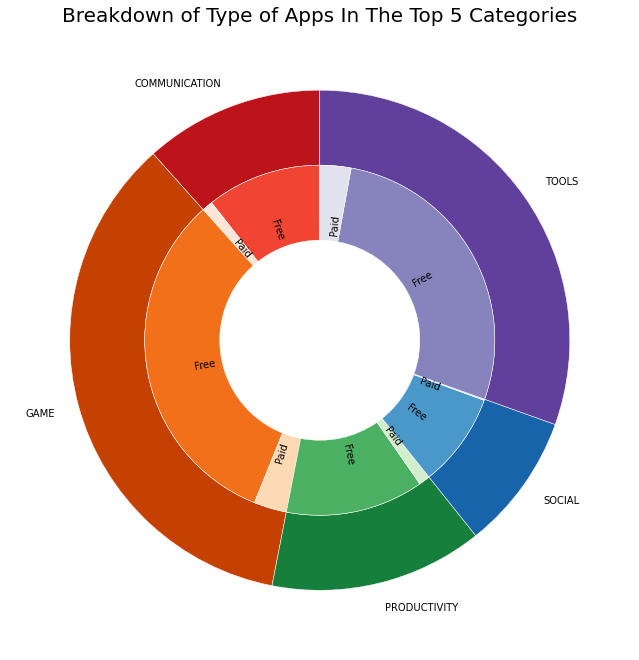

In [62]:
# outer pie chart
bigger = new_df.groupby(by="Category").sum()
bigger_label = bigger.index.tolist()
bigger_value = bigger["size"].values.tolist()

# inner
inner_label = new_df["Type"].tolist()
inner_values = new_df["size"].tolist()

# colour
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Oranges
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.Purples
outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8), cmap4(.8), cmap5(.8)]
inner_colors = [*cmap1(np.linspace(.6, .1, 2)),
                *cmap2(np.linspace(.6, .2, 2)),
                *cmap3(np.linspace(.6, .2, 2)),
                *cmap4(np.linspace(.6, .2, 2)),
                *cmap5(np.linspace(.6, .2, 2))]

# plot
plt.figure(figsize=(11.5,11.5))
size= 0.3
outer = plt.pie(bigger_value, labels=bigger_label, colors=outer_colors, startangle=90, wedgeprops=dict(width=size, edgecolor='w'), radius=1)
inner = plt.pie(inner_values, labels=inner_label, colors=inner_colors, startangle=90, wedgeprops=dict(width=size, edgecolor='w'), radius=1-size,
               labeldistance=0.6, rotatelabels=True)
plt.title("Breakdown of Type of Apps In The Top 5 Categories", fontsize=20)

The nested piechart shows that social apps are the least popular among the top 5. Within social apps, there are only 3 paid apps out of 239 apps, ie 1.26%. On the other hand, 9.43% of the Tools apps and 8.55% of the Game apps are Paid. 

### Is there a difference in number of downloads between "Free" and "Paid"?

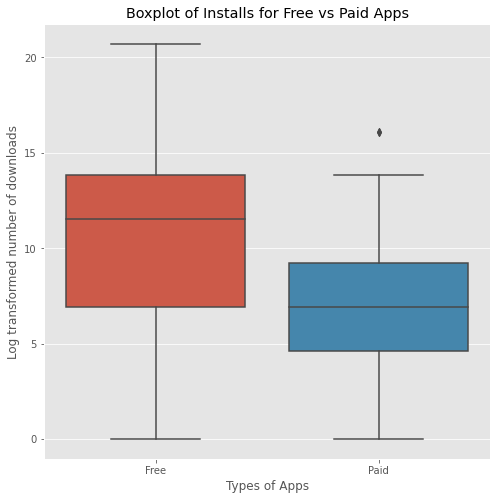

In [63]:
store_df["Installs_log"] = np.log(store_df["Installs"]+1) # plus 1 to avoid log(0) error as there are some with 0 downloads T_T
plt.figure(figsize=(8,8))
sns.boxplot(data=store_df, x="Type", y="Installs_log")
plt.ylabel("Log transformed number of downloads")
plt.xlabel("Types of Apps")
plt.title("Boxplot of Installs for Free vs Paid Apps")
plt.savefig("/home/han/Projects/Android_apps/Graphs/boxplot_free_paid.png")

### Hypothesis testing for the number of downloads between the type of apps

Given that the boxplot of the number of downloads appear to have some overlap, it might still have a significant difference between the different types. We could use a variant of t-test to test the differences. Let's check out some assumptions about the data first

In [64]:
# given that sizes different between the groups, the variance are probably going to be different
from scipy.stats import levene
x = store_df.loc[store_df["Type"]=="Free", "Installs_log"]
y = store_df.loc[store_df["Type"]=="Paid", "Installs_log"]
s, p = levene(x,y)
p  # p-value < 0 , shows that the two distribution do not have the same variance ie homogeneity of variance is violated

1.3113456031787633e-20

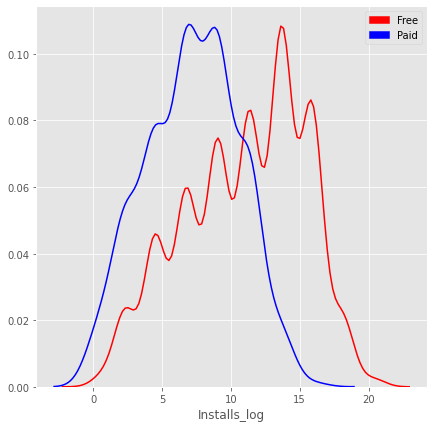

In [65]:
# set the legend
import matplotlib.patches as patches
red = patches.Patch(color="red", label="Free")
blue = patches.Patch(color="blue", label="Paid")

# distribution for free and paid
plt.figure(figsize = (7,7))
sns.distplot(x, hist=False, color="red")
sns.distplot(y, hist=False, color="blue")

plt.legend(handles=[red, blue], loc="upper right", prop={'size': 10})  # it's definitely not normal distribution

In [66]:
# normally, homogeneity of variance is enough but let's test the normality
from scipy.stats import shapiro
stats.shapiro(x)  # p-value < 0, shows the distribution deviates from normal distribution

/home/han/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.9620857238769531, 4.021726592612225e-43)

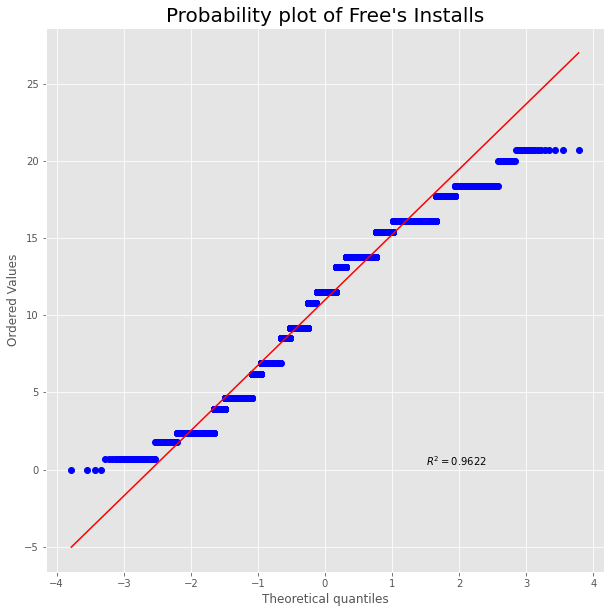

In [67]:
# plot the qqplot for x
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(x, plot= plt, rvalue= True)
ax.set_title("Probability plot of Free's Installs", fontsize= 20)
ax.set

plt.show()

The homogeneity of variance and normality are violated, so student t-test is not advisable. So, an unpaired, non-parametric test should be used. Under these conditions, Mann whitney test is probably the most appropriate. In general, Mann Whitney's assumptions are:

- observations from both groups are independent from each other
- responses are at least ordinal (ie, you can say which is higher)

The null hypothesis: distributions are equal
Alternative hypothesis: distributions are not equal. Since the assumptions are met, we'll go ahead and use the test.

In [68]:
from scipy.stats import mannwhitneyu
stats.mannwhitneyu(x,y)  

MannwhitneyuResult(statistic=1685312.5, pvalue=1.2531215783547303e-116)

We can reject the null hypothesis that the sample distributions are equal between the groups (p-value < 0.05, U= 1685312.5)

## Which app is the most popular in each of the top 5 categories?

# Statistical Analysis

## ANOVA test for "Ratings_imp"

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Ratings_imp~C(Category)", data=store_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
# the results show that there is a significant difference (p < 0.05) but it does not explain the effect size

,sum_sq,df,F,PR(>F)
C(Category),99.287761,32.0,9.058934,1.403697e-42
Residual,3297.308940,9627.0,NaN,NaN


In [70]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Category),99.287761,32.0,3.102743,9.058934,1.403697e-42,0.029232,0.026002
Residual,3297.308940,9627.0,0.342506,NaN,NaN,NaN,NaN


In [71]:
# normality of residuals test
import scipy.stats as stats
stats.shapiro(model.resid)

/home/han/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.8909329175949097, 0.0)

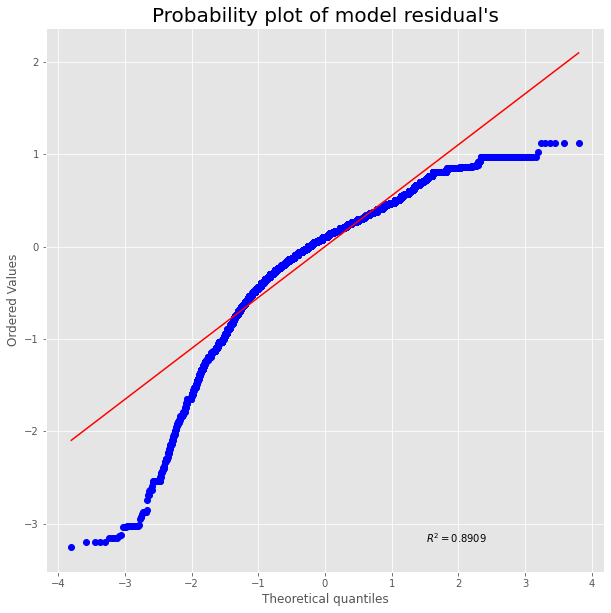

In [72]:
# plot the residuals
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set
plt.savefig("/home/han/Projects/Android_apps/Graphs/qqplot_of_residuals.png")
plt.show()

 The one-way ANOVA test showed that there is a significant difference between the different categories for ratings (p-value  but the effect is small (eta-squared = 0.027). The distrbution of the residuals, however, violated the assumption of normality. Normally, homogeneity of variance would be tested next. However, based on the results of the residual distribution, it is safe to say that non-parametric ANOVA or log transformation of the data should be used instead.

In [73]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model2 = ols("np.log(Ratings_imp)~C(Category)", data=store_df).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
C(Category),9.091811,32.0,9.165921,3.157684e-43
Residual,298.411333,9627.0,NaN,NaN


In [74]:
# normality of residuals test
import scipy.stats as stats
stats.shapiro(model2.resid)

/home/han/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



(0.750262975692749, 0.0)

Log transformation did not improve the distribution of the residuals. Kruskal-Wallis ANOVA should be used. Before we conduct Kruskal-Wallis test, there are a few assumptions that are needed to be met:

1) Samples drawn are random 
2) Observations are independent

Both of these assumptions are met because each app is a unique entry so they are independent of each other.

## Kruskal-Wallis test

In [75]:
# create a crosstable
nom = store_df["Category"]
ordinal = store_df["Ratings_imp"]
crosstable = pd.crosstab(ordinal,nom)
crosstable.sum().sum()

9660

In [76]:
from scipy import stats
s, p = stats.kruskal(*[group["Ratings_imp"].values for name, group in store_df.groupby("Category")])
print(s,p)
# the H-value is 291.97, p-value < 0

291.9695989365334 9.87269222844556e-44


In [77]:
def kruskal_effect_size(h, n, k):
    """
    Return the effect size of Kruskal-Wallis test.
    H = H-value of statistics of Kruskal-Wallis
    n = number of observations
    k = number of groups
    The formulas is from Tomczak and Tomczak (2014)
    """
    return h * (n+1)/(n**2 - 1)
n = len(store_df)   
k = len(store_df["Category"].unique())
kruskal_effect_size(h = s, n=n, k=k)

0.03022772532731477

Kruskal-Wallis test showed that there is a significant difference in "Ratings_imp" between the different categories (p-value < 0, H-value = 291.97) but the effect is weak (eta-squared = 0.03).

# Sentiment Analysis

The Google Play Store data also comes with reviews from the users for some of the apps.

In [78]:
review_df = pd.read_csv("googleplaystore_user_reviews.csv")
review_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [79]:
review_df.shape  # 64295 rows, 5 columns

(64295, 5)

In [80]:
review_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [81]:
review_df["Sentiment"].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [82]:
len(review_df["App"].unique())

1074

From what we could see, there are 64295 rows in the data and only 5 rows. Out of the rows, more than 26k of them contains NaN and there are only 1074 apps. The Sentiment are basically divided into Positive, Neutral and Negative; with nan being likely to be due to error in web crawling. You could see that the NaN in the data do not contribute to anything, so we're going to drop them as they won't lead to loss of information. First, however, we are going to get some information from the other dataframe for more analysis.

In [83]:
# adding a category column
merge_cols = ["App","Category","Type"]
review_df2 = pd.merge(store_df[merge_cols], review_df, left_on=["App"], right_on=["App"], how="right")
review_df2.head()

,App,Category,Type,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,Free,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,Free,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,Free,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,Free,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,Free,I love colors inspyering,Positive,0.500,0.600000


In [84]:
review_df2.isna().sum()  # shows the amount na in the columns

App                           0
Category                   2739
Type                       2739
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [85]:
review_df2 = review_df2.dropna()
review_df2.shape  # the na's are dropped

(35929, 7)

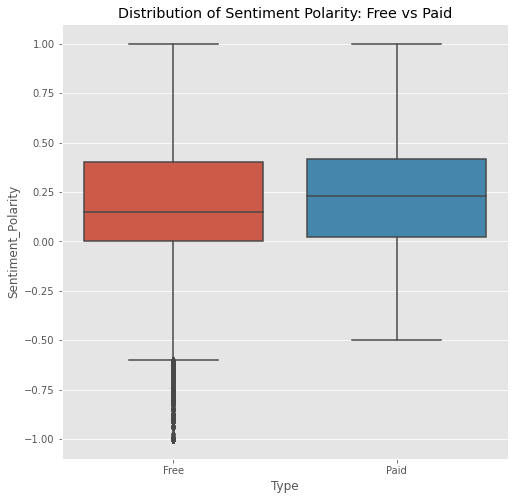

In [86]:
plt.figure(figsize=(8,8))
sns.boxplot(data = review_df2, x="Type", y="Sentiment_Polarity")
plt.title("Distribution of Sentiment Polarity: Free vs Paid")
plt.savefig("/home/han/Projects/Android_apps/Graphs/sentiment_polarity_distribution.png")

## Wordcloud

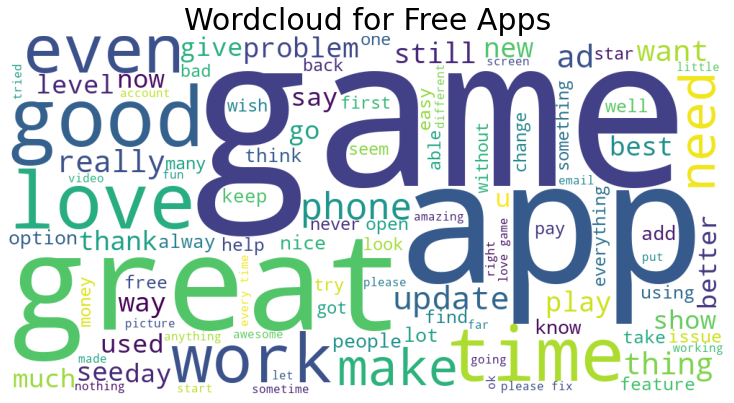

In [87]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

review_words = ""
stopwords = set(STOPWORDS)

# for the apps that are free
for val in review_df2[review_df2["Type"]=="Free"]["Translated_Review"]:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    review_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, height = 500, max_words = 100,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review_words) 

# plot the WordCloud image                        
plt.figure(figsize = (10,7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title("Wordcloud for Free Apps", fontsize=30)
plt.savefig("/home/han/Projects/Android_apps/Graphs/free_word_cloud.png")
plt.show() 

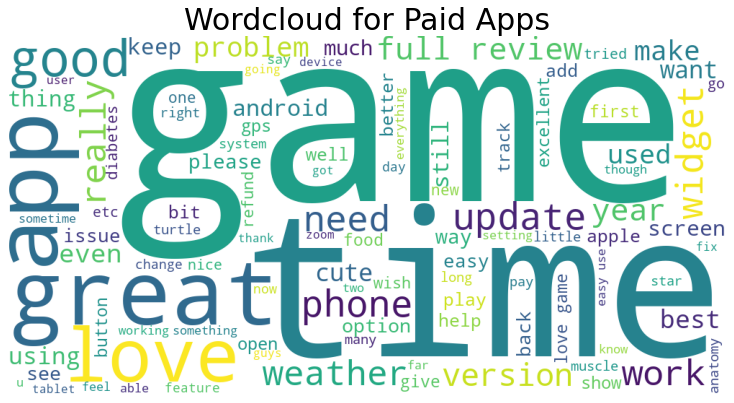

In [88]:
# for the paid apps
review_words = ""
stopwords = set(STOPWORDS)

# for the apps that are free
for val in review_df2[review_df2["Type"]=="Paid"]["Translated_Review"]:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    review_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 1000, height = 500, max_words=100,
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review_words) 

# plot the WordCloud image                        
plt.figure(figsize = (10,7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Wordcloud for Paid Apps", fontsize=30)
plt.savefig("/home/han/Projects/Android_apps/Graphs/paid_word_cloud.png")
plt.show() 

In [93]:
# save to dataframe for machine learning
store_df.to_csv("Processed_google_df.csv", index=False)